(0.037426377, 0.005596726617590192, '')
(0.027998330687500003, 0.00327319893245584, '')
(0.027853899999999997, 0.0025781723242073425, '')
(0.04633456584210526, 0.010549650183668777, '')
(0.04245777505, 0.004834609280226074, '')
(nan, nan, "Didn't finish")


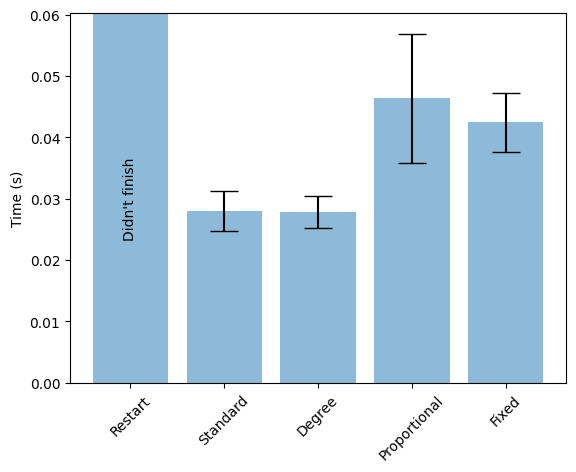

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# make a grouped bar plot with a group for each tileset and a plot for each size
# sizes = list(tilesets["deterministic"]["CarcassonneTileset"].keys())
# tileset_names = list(tilesets["deterministic"].keys())
# type_names = list(tilesets.keys())
# for size in [64, 128, 256]:
#     x = np.arange(len(tileset_names))
#     width = 0.25
#     multiplier = 0

#     plt.figure()
#     for type_name in type_names:
#         y = []
#         for tileset_name in tileset_names:
#             y.append(tilesets[type_name][tileset_name][size])

#         offset = width * multiplier
#         rects = plt.bar(x + offset, y, width, label=type_name)
#         # plt.bar_label(rects, padding=3)
#         multiplier += 1
    
#     # plt.ylim(0, 8)
#     plt.title("Time vs. type for map size {}".format(size))
#     plt.xticks(x + width, tileset_names)
#     plt.legend(loc='upper left', ncols=3)
#     plt.legend()
#     plt.show()

max = 0
data = np.genfromtxt("data/backtracking.csv", delimiter=",", dtype=str)
bar = {}
for i in range(1, len(data)):
    heuristic = data[i][2]
    time = float(data[i][3])
    error = float(data[i][4])
    label = ""
    if np.isnan(time):
        label = "Didn't finish"
    else:
        max = np.maximum(max, time)
    bar[heuristic] = (time, error, label)
    print(bar[heuristic])

for key in bar.keys():
    if np.isnan(bar[key][0]):
        bar[key] = (max * 1.3, bar[key][1], bar[key][2])

x = np.arange(len(bar.keys()))
y = [bar[key][0] for key in bar.keys()]
err = [bar[key][1] for key in bar.keys()]
labels = [bar[key][2] for key in bar.keys()]

fig, ax = plt.subplots()
ax.set_ylim(0, max * 1.3)
b = ax.bar(x, y, yerr=err, capsize=10, align='center', alpha=0.5)
ax.bar_label(b, labels=labels, label_type='center', rotation='vertical')
ax.set_xticks(x, bar.keys(), rotation=45)
ax.set_ylabel("Time (s)")
plt.show()
